In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator           #Aumentar datos y crear nuevas variaciones de datos existentes
import numpy as np                                                            #Biblioteca de operaciones matriciales

In [ ]:
datagen=ImageDataGenerator(
    rescale=1./255,           # Reescala los valores de píxeles a un rango de 0 a 1
    rotation_range=10,        # Rango de rotación en grados
    width_shift_range=0.15,   # Rango de cambio horizontal en fracción de la dimensión total
    height_shift_range=0.15,  # Rango de cambio vertical en fracción de la dimensión total
    shear_range=5,            # Rango de cambio de cizallamiento (shear)
    zoom_range=[0.7,1.3],     # Rango de zoom
    validation_split=0.2      # Fracción de datos a reservar para validación
)

In [ ]:
data_gen_entrenamiento=datagen.flow_from_directory("/content/DATOSENT/",
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   shuffle=True, #Baraja el conjunto de datos
                                                   subset="training")

Found 52 images belonging to 4 classes.


In [ ]:
data_gen_pruebas=datagen.flow_from_directory("/content/PRUEBAS/",
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   shuffle=False, #Baraja el conjunto de datos
                                                   subset="validation")

Found 0 images belonging to 1 classes.


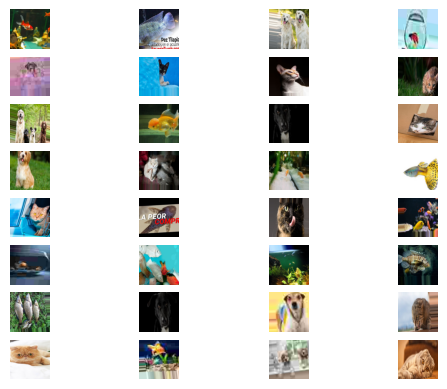

In [ ]:
import matplotlib.pyplot as plt                      #Biblioteca de gráficos

for imagenes, etiquetas in data_gen_entrenamiento:   #Muestra el primer lote de graficos
  for i in range(32):
    plt.subplot(8, 4, i+1)
    plt.imshow(imagenes[i])
    plt.axis('off')
  break
plt.show()


In [ ]:
import tensorflow as tf         #Importa TensorFlow construir y entrenar modelos de aprendizaje profundo.
import tensorflow_hub as hub    #Modelos preentrenados

In [ ]:
url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2=hub.KerasLayer(url,input_shape=(224,224,3))

In [ ]:
#Importante
#Congelar las capas
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(4, activation="softmax")
])

In [ ]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/20
2/2 [==============================] - 7s 567ms/step - loss: 1.6532 - accuracy: 0.2500
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 1.2340 - accuracy: 0.4038
Epoch 3/20
2/2 [==============================] - 2s 580ms/step - loss: 0.9652 - accuracy: 0.5962
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.7483 - accuracy: 0.7115
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.5640 - accuracy: 0.8654
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.4648 - accuracy: 0.8654
Epoch 7/20
2/2 [==============================] - 2s 617ms/step - loss: 0.4015 - accuracy: 0.9038
Epoch 8/20
2/2 [==============================] - 2s 965ms/step - loss: 0.2938 - accuracy: 0.9231
Epoch 9/20
2/2 [==============================] - 2s 519ms/step - loss: 0.2857 - accuracy: 0.9231
Epoch 10/20
2/2 [==============================] - 3s 863ms/step - loss: 0.2504 - accuracy: 0.9423
Epoch 11/20
2/2 [==============

In [ ]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

1/1 [==============================] - 1s 584ms/step
La prediccion es *GATOS*


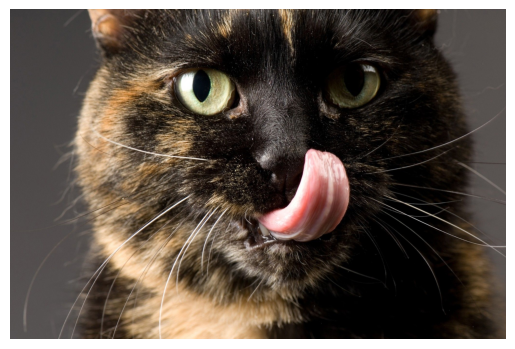

1/1 [==============================] - 0s 67ms/step
La prediccion es *GATOS*


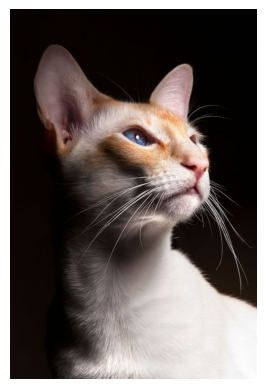

1/1 [==============================] - 0s 46ms/step
La prediccion es *GATOS*


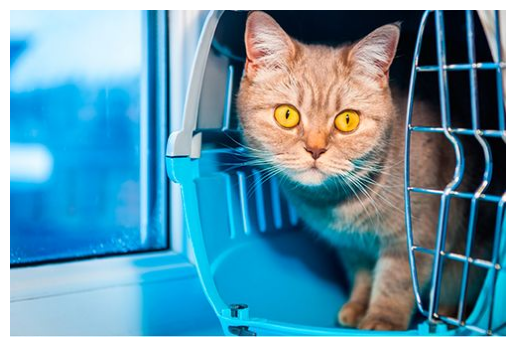

1/1 [==============================] - 0s 65ms/step
PECES


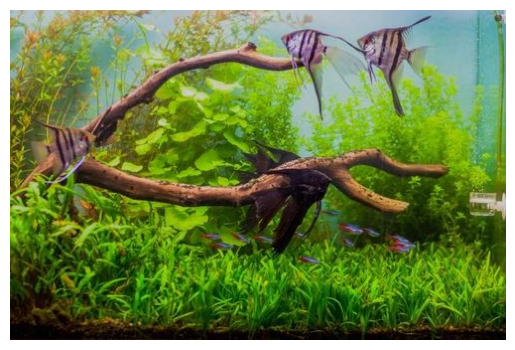

1/1 [==============================] - 0s 72ms/step
La prediccion es *GATOS*


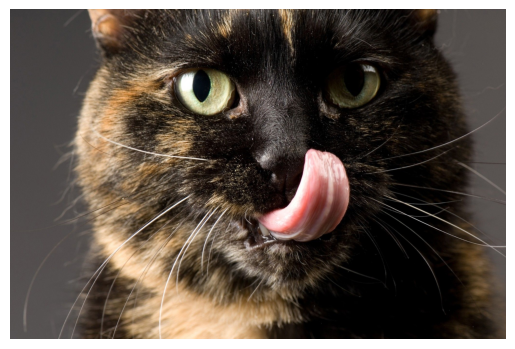

1/1 [==============================] - 0s 82ms/step
La prediccion es *GATOS*


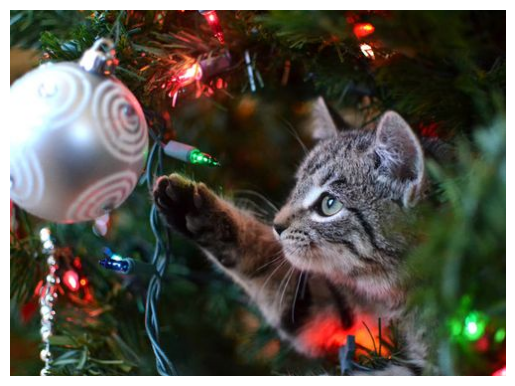

1/1 [==============================] - 0s 75ms/step
PECES


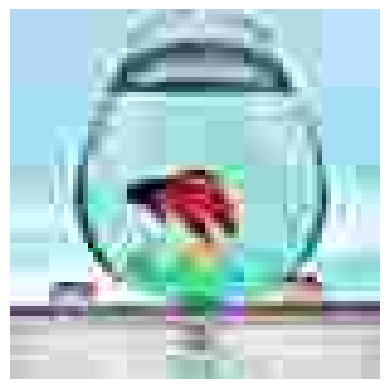

1/1 [==============================] - 0s 53ms/step
PECES


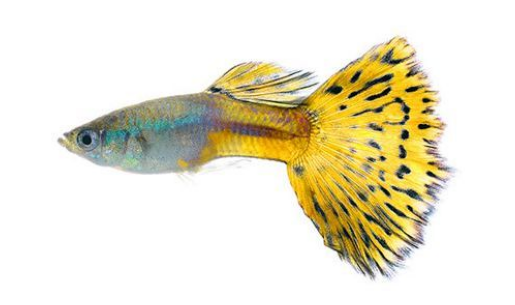

1/1 [==============================] - 0s 49ms/step
La prediccion es *GATOS*


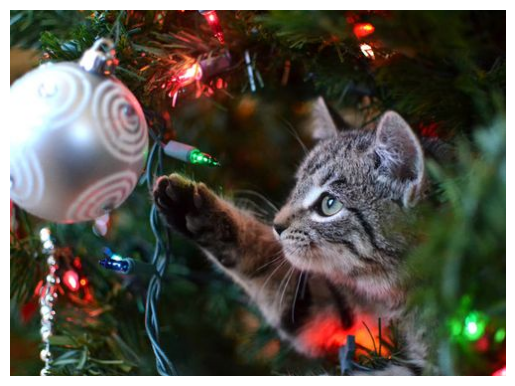

1/1 [==============================] - 0s 67ms/step
PECES


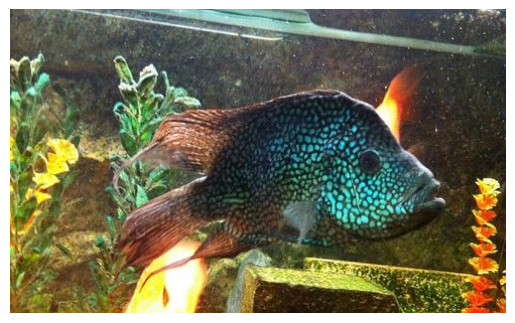

1/1 [==============================] - 0s 68ms/step
La prediccion es *GATOS*


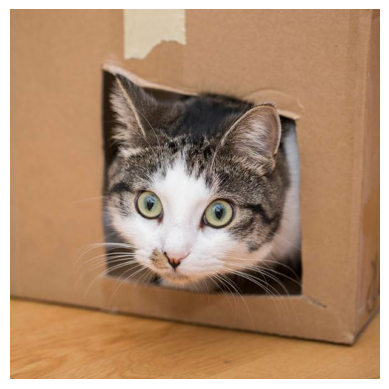

1/1 [==============================] - 0s 64ms/step
La prediccion es *PERROS*


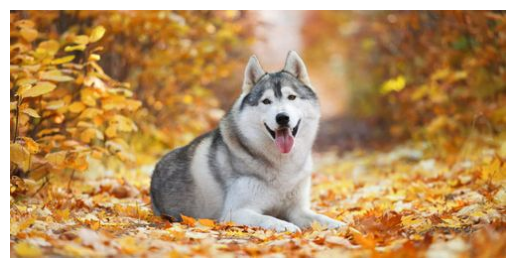

1/1 [==============================] - 0s 65ms/step
La prediccion es *PERROS*


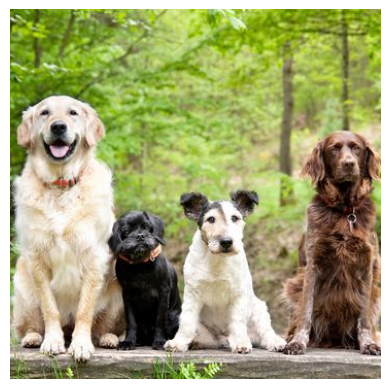

1/1 [==============================] - 0s 119ms/step
La prediccion es *PERROS*


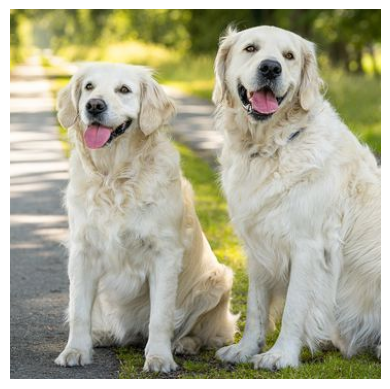

1/1 [==============================] - 0s 129ms/step
La prediccion es *PERROS*


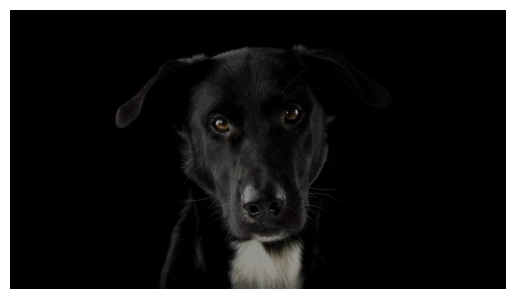

El archivo /content/DATOSPRU/PRUEBAS/16.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/17.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/18.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/19.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/20.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/21.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/22.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/23.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/24.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/25.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/26.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/27.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/28.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/29.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/30.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/31.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/32.jpg no existe.
El archivo /content/DATOSPRU/PRUEBAS/33.jpg no existe.
El archivo

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os

for i in range(1,76):#76
  RUTA="/content/DATOSPRU/PRUEBAS/"+str(i)+".jpg"
  if os.path.isfile(RUTA):
    imagen = mpimg.imread(RUTA)
    prediccion = categorizar(RUTA)
    if prediccion==1:
      print("La prediccion es *GATOS*")
    elif prediccion == 2:
      print("La prediccion es *PERROS*")
    else:
      print("PECES")
    plt.imshow(imagen)
    plt.axis('off')  # Desactivar ejes si no son necesarios
    plt.show()
  else:
    print("El archivo {} no existe.".format(RUTA))